# CNN using coronary heart disease data 

This work is aiming at the design and testing of a deep neural network architecture on Coronary heart disease using Tensorflow and Keras.

## Importing libraries

In [1]:
import numpy as np
import copy
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
np.random.seed(2095)

## Reading the data

In [152]:
# read input file
file = 'C:\\Users\\CardiacPrediction_modified.xlsx'
ipData = pd.read_excel(file, sheet_name='Stroke')
#ipData = pd.read_excel(file, sheet_name='CoroHeartDis')
print(ipData.columns) 

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'Stroke'],
      dtype='object')


## Drop variables

In [153]:
# data drop
#opLabel = np.array(ipData['CoronaryHeartDisease'])
#ipData.drop(['SEQN','CoronaryHeartDisease','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
 #         'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)


opLabel = np.array(ipData['Stroke'])
ipData.drop(['SEQN','Stroke','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'], axis = 1, inplace=True)



In [154]:
# dummy variable for categorical variables
ipData = pd.get_dummies(ipData,columns=["Gender","Diabetes","Blood-Rel-Diabetes","Blood-Rel-Stroke","Vigorous-work","Moderate-work"]) 

varb = np.array(ipData.columns)
ipData = np.array(ipData)

In [155]:
print(ipData.shape)
print(varb)
print(len(opLabel[opLabel==0]))
print(len(opLabel[opLabel==1]))

(37177, 54)
['Age' 'Systolic' 'Diastolic' 'Weight' 'Body-Mass-Index'
 'White-Blood-Cells' 'Basophils' 'Red-Blood-Cells' 'Hemoglobin'
 'Mean-cell-Hemoglobin' 'Platelet-count' 'Mean-Platelet-Vol'
 'Red-Cell-Distribution-Width' 'Albumin' 'ALP' 'AST' 'ALT' 'Cholesterol'
 'Creatinine' 'Glucose' 'GGT' 'Iron' 'LDH' 'Phosphorus' 'Bilirubin'
 'Protein' 'Uric.Acid' 'Triglycerides' 'HDL' 'Glycohemoglobin' 'Gender_1'
 'Gender_2' 'Diabetes_1' 'Diabetes_2' 'Diabetes_3' 'Diabetes_9'
 'Blood-Rel-Diabetes_1' 'Blood-Rel-Diabetes_2' 'Blood-Rel-Diabetes_7'
 'Blood-Rel-Diabetes_9' 'Blood-Rel-Stroke_1' 'Blood-Rel-Stroke_2'
 'Blood-Rel-Stroke_7' 'Blood-Rel-Stroke_9' 'Vigorous-work_1'
 'Vigorous-work_2' 'Vigorous-work_3' 'Vigorous-work_7' 'Vigorous-work_9'
 'Moderate-work_1' 'Moderate-work_2' 'Moderate-work_3' 'Moderate-work_7'
 'Moderate-work_9']
35908
1269


## Feature Nomination using LASSO

In [156]:
#Data condensation using LASSO penalty
from sklearn.linear_model import Lasso, LogisticRegression


featureVote = np.zeros(ipData.shape[1])
print(featureVote.shape)

iteR = 100

for num in range(iteR):
    label0_indx = np.where(opLabel==0)[0]   #no coronary heart disease
    label1_indx = np.where(opLabel==1)[0]   #coronary heart disease 
    numTrainData0 = 1300
    numTrainData1 = 1300
    np.random.shuffle(label0_indx)
    np.random.shuffle(label1_indx)
    
    label0_indx_train = label0_indx[0:numTrainData0-1]
    label1_indx_train = label1_indx[0:numTrainData1-1]
    label0_indx_test  = label0_indx[numTrainData0-1:]
    label1_indx_test  = label1_indx[numTrainData1-1:]
    
    testIndx  = np.append(label0_indx_test,label1_indx_test)
    trainIndx = np.append(label0_indx_train,label1_indx_train)    
    trainData  =  ipData[trainIndx]
    trainLabel =  opLabel[trainIndx]
    testData   =  ipData[testIndx]
    testLabel  =  opLabel[testIndx]    
    
    ##%% data standardization
    scaler = preprocessing.StandardScaler().fit(trainData)
    trainData_scaled = scaler.transform(trainData)
    testData_scaled  = scaler.transform(testData)
    
    ##%% Elastic net and Lasso from scikit
    #regr = ElasticNet(random_state=0, alpha=1, l1_ratio=0.03, tol=0.000001, max_iter=100000)
    regr = Lasso(random_state=0, alpha=0.006, tol=0.000001, max_iter=100000)
    #regr = LogisticRegression(penalty='l1',random_state=0,C=100,tol=0.000001,max_iter=100,class_weight='balanced')
    regr.fit(trainData_scaled,trainLabel)
    cof = np.abs(regr.coef_)    
    colIndx = np.where(cof != 0)[0]
    for col in colIndx:
        featureVote[col]+=1


(54,)


In [157]:
print(featureVote)
print(iter)

[100.  97.  45.  14.  40.  87.  30.  21.  27.  32.  24.  32. 100. 100.
  82.  27.  97. 100. 100.  28.  88.  34.  93.  25.  88.  20.  98.  18.
  89.  52.  84.  52.  89.  94.   1.  54.   7.  72.  14.  56.  94.  87.
  82.   0.  57.   0.  98.   6.  97.  95.   5.  37.   6.  46.]
<built-in function iter>


In [158]:
# feature nomination via Lasso (from feature 1 to 30)
# We keep the dummy variables

#thresH = iteR//5. Pick features occuring more than 5 times
thresH = 0
featureIndx = np.where(featureVote[0:30]>=thresH)[0]
featureIndx = np.append(featureIndx, np.arange(30,ipData.shape[1]))
print(varb[featureIndx])

['Age' 'Systolic' 'Diastolic' 'Weight' 'Body-Mass-Index'
 'White-Blood-Cells' 'Basophils' 'Red-Blood-Cells' 'Hemoglobin'
 'Mean-cell-Hemoglobin' 'Platelet-count' 'Mean-Platelet-Vol'
 'Red-Cell-Distribution-Width' 'Albumin' 'ALP' 'AST' 'ALT' 'Cholesterol'
 'Creatinine' 'Glucose' 'GGT' 'Iron' 'LDH' 'Phosphorus' 'Bilirubin'
 'Protein' 'Uric.Acid' 'Triglycerides' 'HDL' 'Glycohemoglobin' 'Gender_1'
 'Gender_2' 'Diabetes_1' 'Diabetes_2' 'Diabetes_3' 'Diabetes_9'
 'Blood-Rel-Diabetes_1' 'Blood-Rel-Diabetes_2' 'Blood-Rel-Diabetes_7'
 'Blood-Rel-Diabetes_9' 'Blood-Rel-Stroke_1' 'Blood-Rel-Stroke_2'
 'Blood-Rel-Stroke_7' 'Blood-Rel-Stroke_9' 'Vigorous-work_1'
 'Vigorous-work_2' 'Vigorous-work_3' 'Vigorous-work_7' 'Vigorous-work_9'
 'Moderate-work_1' 'Moderate-work_2' 'Moderate-work_3' 'Moderate-work_7'
 'Moderate-work_9']


In [159]:
featureIndx.shape

(54,)

In [160]:
tInx = np.arange(ipData.shape[1])
rrInx = tInx[~np.isin(tInx,featureIndx)]
print(varb[rrInx])

[]


# Dataset reduction (Re-run every time you change the number of training data)

In [161]:

reduced_data = ipData[:,featureIndx]

label0_indx = np.where(opLabel==0)[0]   #no cardiac arrest
label1_indx = np.where(opLabel==1)[0]   #cardiac arrest 
numTrainData0 = 4300
numTrainData1 = 1169
np.random.shuffle(label0_indx)
np.random.shuffle(label1_indx)

label0_indx_train = label0_indx[0:numTrainData0]
label1_indx_train = label1_indx[0:numTrainData1]
label0_indx_test  = label0_indx[numTrainData0:]
label1_indx_test  = label1_indx[numTrainData1:]

testIndx  = np.append(label0_indx_test,label1_indx_test)
trainIndx = np.append(label0_indx_train,label1_indx_train)    
x_train  =  reduced_data[trainIndx]
y_train  =  opLabel[trainIndx]
x_test   =  reduced_data[testIndx]
y_test   =  opLabel[testIndx]    

In [52]:
print(len(label0_indx_test))

31808


In [162]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)

x_train_org = copy.deepcopy(x_train)
x_test_org  = copy.deepcopy(x_test)
y_train_org     = copy.deepcopy(y_train)
y_test_org      = copy.deepcopy(y_test)

## t-SNE visualization

In [14]:
# t-SNE visualization
import imblearn
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns

In [15]:
X_embedded = TSNE(n_components=3, n_iter = 300, verbose=1).fit_transform(x_train)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5300 samples in 0.060s...
[t-SNE] Computed neighbors for 5300 samples in 2.610s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5300
[t-SNE] Computed conditional probabilities for sample 2000 / 5300
[t-SNE] Computed conditional probabilities for sample 3000 / 5300
[t-SNE] Computed conditional probabilities for sample 4000 / 5300
[t-SNE] Computed conditional probabilities for sample 5000 / 5300
[t-SNE] Computed conditional probabilities for sample 5300 / 5300
[t-SNE] Mean sigma: 1.729701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.890976
[t-SNE] KL divergence after 300 iterations: 2.139437


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


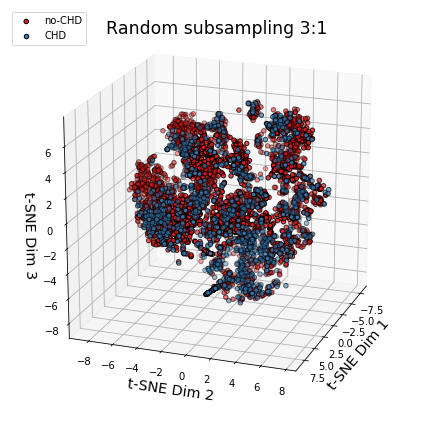

In [16]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_train],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 20
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Random subsampling 3:1",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('tSNE_RUS.png', dpi=100)

In [163]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [164]:
#%% one-hot-encoding
y_train = keras.utils.to_categorical(y_train,2)
y_test  = keras.utils.to_categorical(y_test,2)

In [402]:
#y_train.shape
#y_train
y_train_org

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Running the part above is MANDATORY for training any Network below

## MLP only

In [382]:
# MLP -2
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

FC1    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
DP1    = keras.layers.Dropout(0.2)(AC1)


FC2 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)
outputs = keras.layers.Activation('softmax')(FC2)

myMLP = keras.Model(inputs=inputs,outputs=outputs)
myMLP.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myMLP.summary()


Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 41, 1)]           0         
_________________________________________________________________
reshape_24 (Reshape)         (None, 41)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               21504     
_________________________________________________________________
batch_normalization_45 (Batc (None, 512)               2048      
_________________________________________________________________
activation_57 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               656

In [56]:
class_weight = {0: 1, 1: 10}

myMLP.fit(x_train,y_train,epochs=50,batch_size=500,verbose=1, class_weight=class_weight)

Epoch 1/50
5998/5998 [==============================] - 2s 361us/step - loss: 1.5855 - acc: 0.6109
Epoch 2/50
5998/5998 [==============================] - 0s 66us/step - loss: 1.0625 - acc: 0.6807
Epoch 3/50
5998/5998 [==============================] - 0s 56us/step - loss: 0.9874 - acc: 0.6901
Epoch 4/50
5998/5998 [==============================] - 0s 53us/step - loss: 0.9513 - acc: 0.7132
Epoch 5/50
5998/5998 [==============================] - 0s 53us/step - loss: 0.9265 - acc: 0.7096
Epoch 6/50
5998/5998 [==============================] - 0s 60us/step - loss: 0.8784 - acc: 0.7391
Epoch 7/50
5998/5998 [==============================] - 0s 53us/step - loss: 0.8522 - acc: 0.7424
Epoch 8/50
5998/5998 [==============================] - 0s 52us/step - loss: 0.8063 - acc: 0.7548
Epoch 9/50
5998/5998 [==============================] - 0s 58us/step - loss: 0.8611 - acc: 0.7419
Epoch 10/50
5998/5998 [==============================] - 0s 57us/step - loss: 0.8541 - acc: 0.7519
Epoch 11/50
5998/5

In [244]:
test_loss,test_acc = myMLP.evaluate(x_test,y_test)
print(test_acc)

30170/30170 [==============================] - 2s 82us/step
0.6951939012421888


In [57]:
from sklearn import metrics
predlabel = myMLP.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[26273  4730]
 [   53    72]]


## MLP with additional layers

In [383]:
# MLP -3 :: Input => Hidden(64) => Hidden(128) => Hidden(256)
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

FC1    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
DP1    = keras.layers.Dropout(0.2)(AC1)

FC2    = keras.layers.Dense(256, bias_initializer=keras.initializers.VarianceScaling())(DP1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
#DP2    = keras.layers.Dropout(0.2)(AC2)


FC3 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(AC2)
outputs = keras.layers.Activation('softmax')(FC3)

myMLP3 = keras.Model(inputs=inputs,outputs=outputs)
myMLP3.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myMLP3.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 41, 1)]           0         
_________________________________________________________________
reshape_25 (Reshape)         (None, 41)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2688      
_________________________________________________________________
batch_normalization_47 (Batc (None, 64)                256       
_________________________________________________________________
activation_60 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               832

In [238]:
class_weight = {0: 1, 1: 2.2}

myMLP3.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

Train on 5300 samples
5300/5300 [==============================] - 1s 269us/sample - loss: 0.5313 - accuracy: 0.7945 - los


In [239]:
test_loss,test_acc = myMLP3.evaluate(x_test,y_test)
print(test_acc)


31779/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.80603546


In [240]:
from sklearn import metrics
predlabel = myMLP3.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[25457  6114]
 [   50   158]]


# Introducing convolutional layers

## MLP+Conv :: Input => Hidden(128)  => Conv(4) => Output (2)

In [241]:

inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((128,1))(DP0)
FC1    = keras.layers.Conv1D(4,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1 = keras.layers.MaxPool1D(pool_size=2)(AC1)
FL1   = keras.layers.Flatten()(Pool1)

FC3 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)
outputs = keras.layers.Activation('softmax')(FC3)

myCNN1D1 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D1.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN1D1.summary()


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 41, 1)]           0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 41)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               5376      
_________________________________________________________________
batch_normalization_25 (Batc (None, 128)               512       
_________________________________________________________________
activation_32 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
reshape_12 (Reshape)         (None, 128, 1)            0   

In [264]:
class_weight = {0: 1, 1: 4}

myCNN1D1.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

Train on 5300 samples
5300/5300 [==============================] - 2s 356us/sample - loss: 0.6038 - accuracy: 0.8115


In [265]:
test_loss,test_acc = myCNN1D1.evaluate(x_test,y_test)
print(test_acc)


31779/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.7740332


In [266]:
from sklearn import metrics
predlabel = myCNN1D1.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[24443  7128]
 [   53   155]]


##  MLP+CONV: Input => Hidden(128)  => Conv(4) => Conv(8) => Output (2)

In [267]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((128,1))(DP0)
FC1    = keras.layers.Conv1D(4,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1 = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(8,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2 = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1   = keras.layers.Flatten()(Pool2)

FC3 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)
outputs = keras.layers.Activation('softmax')(FC3)

myCNN1D2 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D2.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN1D2.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 41, 1)]           0         
_________________________________________________________________
reshape_13 (Reshape)         (None, 41)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               5376      
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
_________________________________________________________________
activation_35 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
reshape_14 (Reshape)         (None, 128, 1)            0   

In [288]:
class_weight = {0: 1, 1: 4.5}

myCNN1D2.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

Train on 5300 samples
5300/5300 [==============================] - 6s 1ms/sample - loss: 0.6170 - accuracy: 0.8070


In [289]:
test_loss,test_acc = myCNN1D2.evaluate(x_test,y_test)
print(test_acc)


31779/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.7797288


In [290]:
from sklearn import metrics
predlabel = myCNN1D2.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[24629  6942]
 [   58   150]]


## MLP+Conv :: Input => Hidden(64) => Conv(2) => Hidden(512)  

In [82]:

inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(32, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((32,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1 = keras.layers.MaxPool1D(pool_size=2)(AC1)
FL1   = keras.layers.Flatten()(Pool1)

FC2    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
#DP2    = keras.layers.Dropout(0.2)(AC2)


FC3 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(AC2)
outputs = keras.layers.Activation('softmax')(FC3)

myCNN1D3 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D3.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myCNN1D3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 50, 1)             0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1632      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32)                128       
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 32, 1)             0         
__________

In [215]:
class_weight = {0: 1, 1: 50}

myCNN1D3.fit(x_train,y_train,epochs=5,verbose=1, class_weight=class_weight)

Epoch 1/50
5300/5300 [==============================] - 1s 155us/step - loss: 0.6463 - acc: 0.7902
Epoch 2/50
5300/5300 [==============================] - 1s 142us/step - loss: 0.6470 - acc: 0.7785
Epoch 3/50
5300/5300 [==============================] - 1s 138us/step - loss: 0.6597 - acc: 0.7794
Epoch 4/50
5300/5300 [==============================] - 1s 140us/step - loss: 0.6556 - acc: 0.7813
Epoch 5/50
5300/5300 [==============================] - 1s 136us/step - loss: 0.6609 - acc: 0.7800
Epoch 6/50
5300/5300 [==============================] - 1s 137us/step - loss: 0.6608 - acc: 0.7777
Epoch 7/50
5300/5300 [==============================] - 1s 138us/step - loss: 0.6770 - acc: 0.7808
Epoch 8/50
5300/5300 [==============================] - 1s 144us/step - loss: 0.6473 - acc: 0.7817
Epoch 9/50
5300/5300 [==============================] - 1s 155us/step - loss: 0.6679 - acc: 0.7836
Epoch 10/50
5300/5300 [==============================] - 1s 163us/step - loss: 0.6650 - acc: 0.7783
Epoch 11/

In [216]:
test_loss,test_acc = myCNN1D3.evaluate(x_test,y_test)
print(test_acc)

31779/31779 [==============================] - 2s 52us/step
0.7234337140897953


In [209]:
from sklearn import metrics
predlabel = myCNN1D3.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[25009  6562]
 [   63   145]]


## MLP+ CONV: Input => Dense(64) => Conv(2) => Conv(4) = Dense(512) => Dense (2) [Best model]

In [175]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)

FL1    = keras.layers.Flatten()(Pool2)

FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(DP3)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN1D4 = keras.Model(inputs=inputs,outputs=outputs)
myCNN1D4.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

#myCNN1D4.summary()

In [196]:
class_weight = {0: 1, 1: 2.9}

myCNN1D4.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

Train on 5469 samples
5469/5469 [==============================] - 2s 415us/sample - loss: 0.7087 - accuracy: 0.7425


In [197]:
test_loss,test_acc = myCNN1D4.evaluate(x_test,y_test)
print(test_acc)


31708/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.77018416


In [198]:
from sklearn import metrics
predlabel = myCNN1D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[24353  7255]
 [   32    68]]


In [17]:
y_train @ np.transpose(np.array([0, 1]))
1/41

0.024390243902439025

## Input => Dense(64) => Conv(2) => Conv(4) = Conv(8) => Dense (2)

In [291]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FC2    = keras.layers.Conv1D(4,5,strides=1)(Pool1)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool2  = keras.layers.AveragePooling1D(pool_size=2)(AC2)


FC3    = keras.layers.Conv1D(6,7,strides=1)(Pool2)
BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3    = keras.layers.Activation('relu')(BN3)
Pool3  = keras.layers.AveragePooling1D(pool_size=2)(AC3)




FL1    = keras.layers.Flatten()(Pool3)

#FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
#BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
#AC3    = keras.layers.Activation('relu')(BN3)
#DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(FL1)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN5D4 = keras.Model(inputs=inputs,outputs=outputs)
myCNN5D4.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN5D4.summary()


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 41, 1)]           0         
_________________________________________________________________
reshape_15 (Reshape)         (None, 41)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2688      
_________________________________________________________________
batch_normalization_30 (Batc (None, 64)                256       
_________________________________________________________________
activation_39 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
reshape_16 (Reshape)         (None, 64, 1)             0   

In [329]:
class_weight = {0: 1, 1: 3.0}

myCNN5D4.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

Train on 5300 samples
5300/5300 [==============================] - 2s 387us/sample - loss: 0.6142 - accuracy: 0.7885


In [330]:
test_loss,test_acc = myCNN5D4.evaluate(x_test,y_test)
print(test_acc)


31779/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.79388905


In [331]:
from sklearn import metrics
predlabel = myCNN5D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[25069  6502]
 [   48   160]]


## Input => Dense(64) => Conv(2) => Dense (128) = Conv(4) => Dense (2)

In [333]:
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

RS1    = keras.layers.Reshape((64,1))(DP0)
FC1    = keras.layers.Conv1D(2,3,strides=1)(RS1)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
Pool1  = keras.layers.AveragePooling1D(pool_size=2)(AC1)

FL0 = keras.layers.Flatten()(Pool1)

AA1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(FL0)
BB1 = keras.layers.BatchNormalization(axis=-1)(AA1)
CC1 = keras.layers.Activation('relu')(BB1)
Pool2 = keras.layers.Dropout(0.2)(CC1)


RS2    = keras.layers.Reshape((128,1))(Pool2)
FC2    = keras.layers.Conv1D(4,5,strides=1)(RS2)
BN2    = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2    = keras.layers.Activation('relu')(BN2)
Pool3  = keras.layers.AveragePooling1D(pool_size=2)(AC2)



FL1    = keras.layers.Flatten()(Pool3)

#FC3    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
#BN3    = keras.layers.BatchNormalization(axis=-1)(FC3)
#AC3    = keras.layers.Activation('relu')(BN3)
#DP3    = keras.layers.Dropout(0.2)(AC3)


FC4    = keras.layers.Dense(2)(FL1)
outputs = keras.layers.Activation('softmax')(FC4)

myCNN5D4 = keras.Model(inputs=inputs,outputs=outputs)
myCNN5D4.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

myCNN5D4.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 41, 1)]           0         
_________________________________________________________________
reshape_19 (Reshape)         (None, 41)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                2688      
_________________________________________________________________
batch_normalization_37 (Batc (None, 64)                256       
_________________________________________________________________
activation_47 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
reshape_20 (Reshape)         (None, 64, 1)             0  

In [378]:
class_weight = {0: 1, 1: 2.5}

myCNN5D4.fit(x_train,y_train,epochs=1,verbose=1, class_weight=class_weight)

Train on 5300 samples
5300/5300 [==============================] - 2s 467us/sample - loss: 0.5612 - accuracy: 0.8066


In [379]:
test_loss,test_acc = myCNN5D4.evaluate(x_test,y_test)
print(test_acc)


31779/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.83662164


In [380]:
from sklearn import metrics
predlabel = myCNN5D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

[[26439  5132]
 [   60   148]]


# Running SVM on the subsampled data

In [166]:
from sklearn.svm import SVC
from sklearn import metrics

svcCAD = SVC(C= 0.05, gamma=1/41, kernel='rbf', class_weight='balanced')
svcCAD.fit(x_train_org,y_train_org)
predlabel = svcCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)

[[20616 10992]
 [   19    81]]


# Running random forest and adaboost

In [171]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
class_weight = {0: 1, 1: 3}
adaboostCAD = AdaBoostClassifier(n_estimators=1000, random_state=0)
adaboostCAD.fit(x_train_org,y_train_org)
predlabel = adaboostCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)

[[28507  3101]
 [   61    39]]


In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#randomforestCAD = RandomForestClassifier(max_depth=3, random_state=0, class_weight='balanced_subsample')

parameters = {'n_estimators': (10,30,50,100,130,160,200), 'max_depth': (2, 3)}
randomforestCAD = GridSearchCV(RandomForestClassifier(random_state=0, class_weight='balanced_subsample'),
                               parameters, cv=5)



randomforestCAD.fit(x_train_org,y_train_org)
#predlabel = randomforestCAD.predict(x_test_org)
#confMat = metrics.confusion_matrix(y_test_org,predlabel)
#print(confMat)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced_subsample',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                   

In [173]:
print(randomforestCAD.cv_results_)
print(randomforestCAD.best_estimator_)

{'mean_fit_time': array([0.08282938, 0.29387021, 0.41897631, 0.91056685, 1.08984051,
       1.48873553, 1.74985399, 0.10677276, 0.35040135, 0.55309949,
       0.9704864 , 1.36055346, 1.66107883, 2.0696424 ]), 'std_fit_time': array([0.01321978, 0.04958023, 0.00931091, 0.0808649 , 0.02317977,
       0.17198261, 0.05095598, 0.00560664, 0.05300702, 0.04671714,
       0.0828567 , 0.14032874, 0.12028738, 0.2024198 ]), 'mean_score_time': array([0.00357881, 0.01119542, 0.01858797, 0.03424735, 0.03344407,
       0.04744153, 0.06088629, 0.00200262, 0.01081433, 0.02069693,
       0.03192062, 0.04012713, 0.0544744 , 0.05908551]), 'std_score_time': array([0.00715761, 0.00727246, 0.00299435, 0.00815109, 0.00282151,
       0.00494403, 0.01209187, 0.00400524, 0.00060113, 0.00620093,
       0.00728746, 0.00440803, 0.01475358, 0.00702579]), 'param_max_depth': masked_array(data=[2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
             mask=[False, False, False, False, False, False, False, False,
         

In [174]:
randomforestCADopt = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=2, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

randomforestCADopt.fit(x_train_org,y_train_org)
predlabel = randomforestCADopt.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)


[[23532  8076]
 [   26    74]]


# The following section shows the result when 70% of data are used for training

In [62]:
# With train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(reduced_data, opLabel, test_size = 0.3, random_state = 24)

In [260]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [261]:
#%% one-hot-encoding
Y_train = keras.utils.to_categorical(Y_train,2)
Y_test  = keras.utils.to_categorical(Y_test,2)

In [262]:
# MLP -2
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

FC1    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
DP1    = keras.layers.Dropout(0.2)(AC1)


FC2 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)
outputs = keras.layers.Activation('softmax')(FC2)

myMLP = keras.Model(inputs=inputs,outputs=outputs)
myMLP.compile(optimizer=keras.optimizers.Adam(lr=0.01),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myMLP.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 39, 1)             0         
_________________________________________________________________
reshape_18 (Reshape)         (None, 39)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               20480     
_________________________________________________________________
batch_normalization_38 (Batc (None, 512)               2048      
_________________________________________________________________
activation_52 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               65664     
__________

In [263]:
np.where(Y_train==0)[0].shape
np.where(Y_train==1)[0].shape


(26017,)

In [280]:
class_weight = {0: 1, 1: 40}

myMLP.fit(X_train,Y_train,epochs=10,batch_size=1200,verbose=1, class_weight=class_weight)

Epoch 1/10
26017/26017 [==============================] - 2s 66us/step - loss: 0.4354 - acc: 0.8823
Epoch 2/10
26017/26017 [==============================] - 2s 65us/step - loss: 0.4301 - acc: 0.8798
Epoch 3/10
26017/26017 [==============================] - 2s 65us/step - loss: 0.4396 - acc: 0.8772
Epoch 4/10
26017/26017 [==============================] - 2s 66us/step - loss: 0.4319 - acc: 0.8824
Epoch 5/10
26017/26017 [==============================] - 2s 66us/step - loss: 0.4439 - acc: 0.8762
Epoch 6/10
26017/26017 [==============================] - 2s 66us/step - loss: 0.4338 - acc: 0.8793
Epoch 7/10
26017/26017 [==============================] - 2s 64us/step - loss: 0.4370 - acc: 0.8830
Epoch 8/10
26017/26017 [==============================] - 2s 66us/step - loss: 0.4202 - acc: 0.8786
Epoch 9/10
26017/26017 [==============================] - 2s 65us/step - loss: 0.4360 - acc: 0.8829
Epoch 10/10
26017/26017 [==============================] - 2s 65us/step - loss: 0.4170 - acc: 0.8762

In [281]:
test_loss,test_acc = myMLP.evaluate(X_test,Y_test)
print(test_acc)

11151/11151 [==============================] - 1s 67us/step
0.8492511882449295


In [282]:
from sklearn import metrics
predlabel = myMLP.predict(X_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(Y_test,axis=1),f)
print(confMat)

[[9237 1450]
 [ 231  233]]


## Logistic Regression

In [211]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs',max_iter=100000, 
                           class_weight= {0:1, 1:3.0}, verbose=1, random_state = 2)
model = clf.fit(x_train_org,y_train_org)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [212]:
predlabel = model.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)

In [213]:
print(confMat)

[[24286  7322]
 [   26    74]]
